# Naive-Bayes Classifier From Scratch

Bibliotecas e conjunto de dados usados 

_Libraries and dataset used_


Referências do conjunto de dados (_Dataset references_):

Anderson, E. (1936). The Species Problem in Iris. Annals of the Missouri Botanical Garden, 23(3), 457–509. https://doi.org/10.2307/2394164

FISHER, R.A. (1936), THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS. Annals of Eugenics, 7: 179-188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x


In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_style("darkgrid")

In [101]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Descrição de quantidades de espécies de flores dentre todos os exemplos

_Description of amount of flower species among all samples_

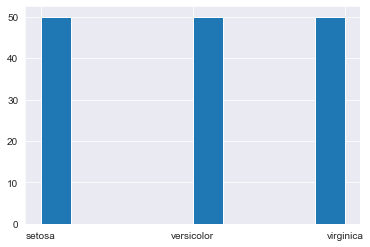

In [102]:
iris['species'].hist()

Busca e seleção de atributos correlacionados, de forma a formar um subconjunto de atributos aproximadamente independentes

(_Search for correlated features in the dataset for building a subset of approximately independent features_) 

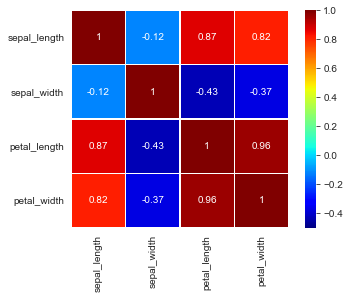

In [103]:
corr = iris.iloc[:,:-1].corr(method="pearson")
cmap = 'jet'
sns.heatmap(corr, vmax = 1, vmin = -.5, cmap=cmap, square=True, linewidths=.2, annot = True)

In [104]:
data = iris[['sepal_length','sepal_width','species']].copy()
data.head(10)

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
5,5.4,3.9,setosa
6,4.6,3.4,setosa
7,5.0,3.4,setosa
8,4.4,2.9,setosa
9,4.9,3.1,setosa


Variáveis independentes selecionadas: tamanho de sépala ('sepal_length') e largura de sépala ('sepal_width')

_Selected variables: sepal length and sepal width_

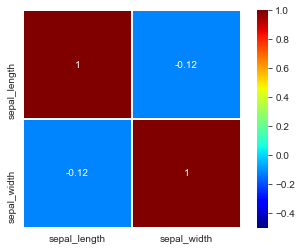

In [105]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = 'jet'
sns.heatmap(corr, vmax = 1, vmin = -.5, cmap=cmap, square=True, linewidths=.2, annot = True)

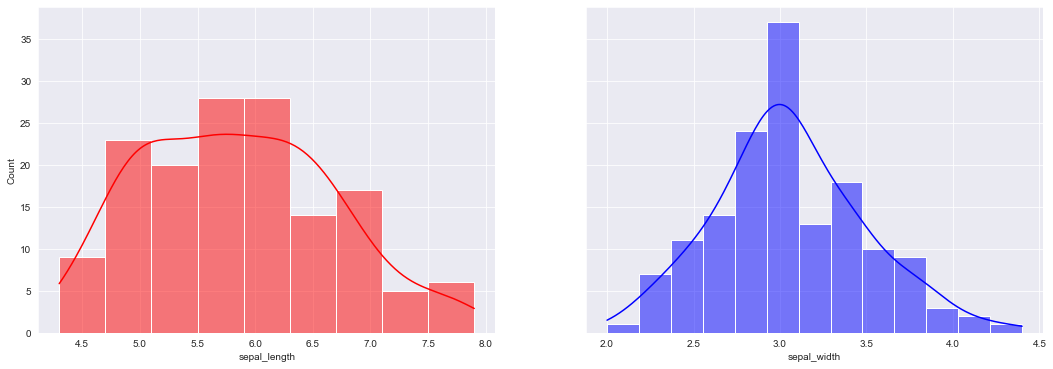

In [106]:
fig, axes = plt.subplots(1, 2, figsize = (18,6), sharey =True)
sns.histplot(data, ax = axes[0], x="sepal_length", kde=True, color='r');
sns.histplot(data, ax = axes[1], x="sepal_width", kde=True, color='b');

Código para transformar a coluna _'species'_ em variável numérica

_Code to encode the 'species' column into a numeric categorical variable_

In [107]:
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(data['species'])
speciesIndex = labelEncoder.transform(data['species'])
data['species_index'] = speciesIndex
data.drop(columns = 'species', inplace = True)
data.head()

,sepal_length,sepal_width,species_index
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [108]:
def calculate_prior(df,Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y] == i])/len(df))
    return prior

In [109]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y] == label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1/(np.sqrt(2*np.pi)*std)) * np.exp(-((feat_val - mean)**2/(2*std**2)))
    return p_x_given_y

In [110]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])
        
        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        
        Y_pred.append(np.argmax(post_prob))
    
    return np.array(Y_pred)

In [111]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = .2, random_state = 41)

X_test = test.iloc[:,:-1].values
Y_test = test['species_index']
Y_pred = naive_bayes_gaussian(train, X = X_test, Y ='species_index')

Text(34.0, 0.5, 'True Class')

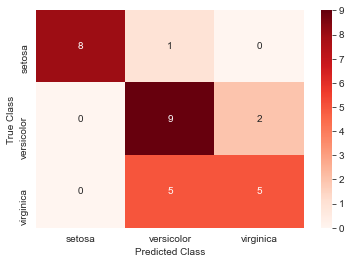

In [112]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

categoricalLabel = labelEncoder.classes_
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap='Reds', annot=True, xticklabels=categoricalLabel, yticklabels=categoricalLabel);
plt.xlabel('Predicted Class')
plt.ylabel('True Class')


In [113]:
labels_test = labelEncoder.inverse_transform(Y_test)
labels_pred = labelEncoder.inverse_transform(Y_pred)
print(classification_report(labels_test,labels_pred,digits = 3))

              precision    recall  f1-score   support

      setosa      1.000     0.889     0.941         9
  versicolor      0.600     0.818     0.692        11
   virginica      0.714     0.500     0.588        10

    accuracy                          0.733        30
   macro avg      0.771     0.736     0.741        30
weighted avg      0.758     0.733     0.732        30

